In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(0)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

# created empty lists for all the values I would extract from json
temp_l = []
humidity_l = []
cloudiness_l = []
windspeed_l = []
country_code_l = []
date_l = []
maxtemp_l = []
lat_l = []
lng_l = []
cities_l = []

# looping through all cities and adding them to url 
for city in cities:
    query_url = (f'{base_url}{city}&APPID={api_key}')
    city_data = requests.get(query_url).json()
    try:
        temp = city_data['main']['temp']
        humidity = city_data['main']['humidity']
        cloudiness = city_data['clouds']['all']
        windspeed = city_data['wind']['speed']
        countrycode = city_data['sys']['country']
        date = city_data['dt']
        maxtemp = city_data['main']['temp_max']
        lat = city_data['coord']['lat']
        lng = city_data['coord']['lon']
        
# appending into my lists       
        temp_l.append(temp)
        humidity_l.append(humidity)
        cloudiness_l.append(cloudiness)
        windspeed_l.append(windspeed)
        country_code_l.append(countrycode)
        date_l.append(date)
        maxtemp_l.append(maxtemp)
        lat_l.append(lat)
        lng_l.append(lng)
        cities_l.append(city)                    
    except: 'CountryNotFound'      

In [4]:
# created dataframe 
df = pd.DataFrame({'City': cities_l, 'Cloudiness': cloudiness_l, 
                  'Country': country_code_l, 'Date': date_l, 
                  'Humidity': humidity_l,'Latitude': lat_l, 'Tempature': temp_l, 
                  'Max Temp': maxtemp_l, 'Wind Speed': windspeed_l})

Text(0, 0.5, 'Tempature')

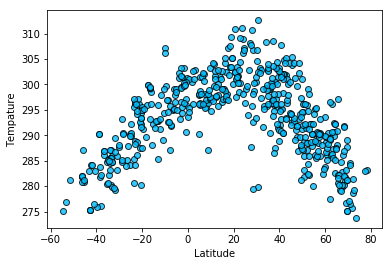

In [6]:
plt.scatter(df['Latitude'],df['Tempature'], marker = 'o', color = 'deepskyblue', edgecolor = 'black', alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Tempature")

Text(0, 0.5, 'Humidity')

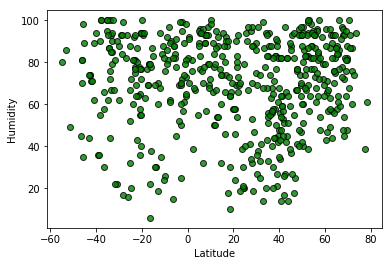

In [7]:
plt.scatter(df['Latitude'], df['Humidity'], marker = 'o', color = 'green', edgecolor = 'black', alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

Text(0, 0.5, 'Cloudiness')

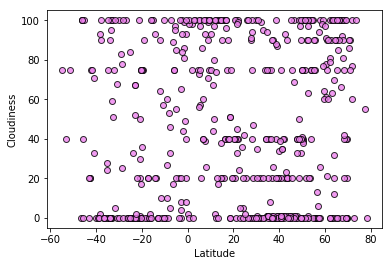

In [8]:
plt.scatter(df['Latitude'], df['Cloudiness'], marker = 'o', color = 'violet', edgecolor = 'black', alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Text(0, 0.5, 'Windspeed')

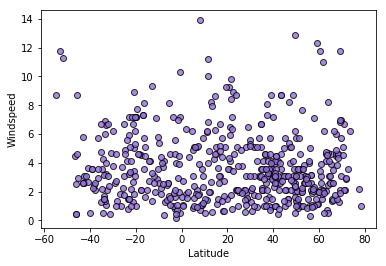

In [9]:
plt.scatter(df['Latitude'], df['Wind Speed'], marker = 'o', color = 'mediumpurple', edgecolor = 'black', alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")